In [1]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

from minigrad.engine import Value
from minigrad.loss import BCELoss, CategoricalCrossEntropyLoss
from minigrad.nn import MLP
from minigrad.optim import SGD, ADAGrad, RMSProp, ADAM

In [2]:
from minigrad import loss
from minigrad import engine
import importlib
importlib.reload(loss)
importlib.reload(engine)
from minigrad.loss import BCELoss, CategoricalCrossEntropyLoss
from minigrad.engine import Value

(1797, 64)


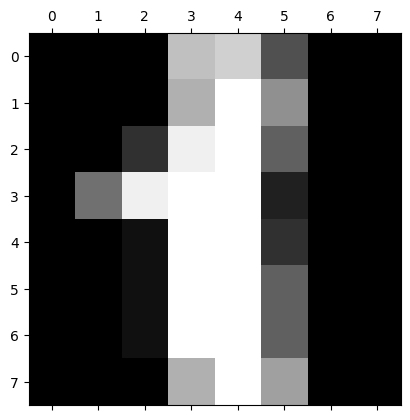

In [2]:
digits = load_digits()
print(digits.data.shape)

plt.matshow(digits.images[1], cmap='gray')

X = pd.DataFrame(digits.data, columns=digits.feature_names)
y = pd.DataFrame(digits.target, columns=['TARGET'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=8, shuffle=True, stratify=y)

In [ ]:
classifier = MLP(
    nin=len(X_train.columns),
    nouts=[16, len(digits.target_names)],
    activation='tanh'
)

# setup hyperparameters
epochs = 10

# setup loss function and optimizer
cce_loss = CategoricalCrossEntropyLoss()
optimizer = SGD(
    params=classifier.parameters()
)

actuals = [
    [1 if i == actual else 0 for i in range(10)]
    for actual in y_train.TARGET.values
]

epoch_to_params = {}
for e in tqdm(range(epochs), total=epochs):
# for e in range(epochs):
    # forward pass
    ypreds = [classifier(x.values) for _, x in X_train.iterrows()]
    loss = cce_loss(actuals, ypreds)

    # zero grad
    classifier.zero_grad()

    # backward prop
    loss.backward()

    # recalculate the new values for all parameters - optimizer.step()
    optimizer.step()

    epoch_to_params.update({
        e: classifier.parameters()
    })

    print(f'Epoch: {e}, Loss: {loss}')

 10%|█         | 1/10 [00:40<06:07, 40.87s/it]

Epoch: 0, Loss: Value(data=2.4122930652235324, grad=1, label=)


 20%|██        | 2/10 [01:48<07:33, 56.75s/it]

Epoch: 1, Loss: Value(data=2.2534885267534057, grad=1, label=)


 30%|███       | 3/10 [03:46<09:51, 84.57s/it]

Epoch: 2, Loss: Value(data=2.048507499514049, grad=1, label=)


 40%|████      | 4/10 [05:49<09:58, 99.75s/it]

Epoch: 3, Loss: Value(data=1.906397722338103, grad=1, label=)


 50%|█████     | 5/10 [08:01<09:16, 111.29s/it]

Epoch: 4, Loss: Value(data=1.7055477093904836, grad=1, label=)


In [42]:
all_res = list()
for counter in range(len(X_test)):
    pred = sorted(
        [(cnt, val) for cnt, val in enumerate(classifier(X_test.iloc[counter, :].values))],
        key = lambda x: x[1],
        reverse=True
    )[0][0]
    actual = int(y_test.iloc[counter, :].TARGET)

    res = {
        'PREDICTED': pred,
        'ACTUAL': actual
    }

    all_res.append(res)

In [43]:
res_df = pd.DataFrame.from_records(all_res)

In [44]:
res_df['IS_CORRECT'] = res_df.apply(lambda row: int(row['PREDICTED'] == row['ACTUAL']), axis = 1)

In [45]:
res_df.loc[res_df.IS_CORRECT == 1]

,PREDICTED,ACTUAL,IS_CORRECT
0,7,7,1
2,7,7,1
3,7,7,1
14,7,7,1
29,7,7,1
47,7,7,1
61,7,7,1
71,7,7,1
79,7,7,1
84,7,7,1


In [ ]:
loss = loss(actuals, ypreds)

In [ ]:
actuals = [
    [1 if i == actual else 0 for i in range(10)]
    for actual in y_train.TARGET.values
]

loss = CategoricalCrossEntropyLoss()
loss(actuals, ypreds)

In [ ]:
epsilon = 10e-12
ypred = 0
1*Value(max(min(ypred, 1 - epsilon), epsilon)).log()

In [ ]:
sum(actuals[0][i]*max(min(ypreds[0][i], 1 - 10e-12), 10e-12).log() for i in range(len(ypreds[0])))

In [ ]:
max(min(Value(1), Value(1 - 10e-12)), Value(10e-12))

In [ ]:
yactual = 0.2
ypred = Value(0.8)

r = -yactual*ypred.log()
r.backward()

In [ ]:
draw_dot(ypreds[0][0])

In [38]:
def print_graph_labels(node, visited=None, depth=0):
    if visited is None:
        visited = set()

    if node in visited:
        return
    visited.add(node)

    # Print the label with indentation based on depth
    if node.label:
        indent = "  " * depth
        label = f"{node.label}" if node.label else "(no label)"
        print(f"{indent}{label} -> {node._op}")

    for child in node._prev:
        print_graph_labels(child, visited, depth + 1)


print_graph_labels(ypreds[1][0])

                                  bias -> 
                                    w0 -> 
                                                                                                                                                                      bias -> 
                                                                                                                                                                        w0 -> 
                                                                                                                                                                      w1 -> 
                                                                                                                                                                    w2 -> 
                                                                                                                                                                  w3 -> 
                                                   

In [1]:
from minigrad.engine import Value
r = (1 - Value(10e-2)).max(Value(10e-1)).min(Value(10e-3)).log()

In [24]:
pred = ypreds
actual = actuals

In [7]:
# epsilon = Value(10e-12)
epsilon = 10e-12
print(ypreds[0][0].data)
print(1 - epsilon)
ypreds[0][0].min(1 - epsilon)

-0.281402861334705
0.99999999999


Value(data=-0.281402861334705, grad=0.0, label=)

In [33]:
epsilon = Value(10e-12)
losses = [
    sum(-yactual*ypred.min(1 - epsilon).max(epsilon).log() for ypred, yactual in zip(ypreds, yactuals))
    for ypreds, yactuals in zip(pred, actual)
]
sum(losses)

Value(data=253.28436022934508, grad=0.0, label=)